# Experimenting the use of GTFS package

In [71]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from io import BytesIO
from zipfile import ZipFile

## Opening data from local computer

In [22]:
df = pd.read_table('shape2.txt', delimiter=',')
df.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,2550_20200408_1,60.209787,25.077401,1,0.000
1,2550_20200408_1,60.209630,25.076818,2,0.036
2,2550_20200408_1,60.209586,25.076673,3,0.046
3,2550_20200408_1,60.209482,25.076290,4,0.070
4,2550_20200408_1,60.209403,25.076035,5,0.086


In [23]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.shape_pt_lat, df.shape_pt_lon))
gdf.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled,geometry
0,2550_20200408_1,60.209787,25.077401,1,0.000,POINT (60.20979 25.07740)
1,2550_20200408_1,60.209630,25.076818,2,0.036,POINT (60.20963 25.07682)
2,2550_20200408_1,60.209586,25.076673,3,0.046,POINT (60.20959 25.07667)
3,2550_20200408_1,60.209482,25.076290,4,0.070,POINT (60.20948 25.07629)
4,2550_20200408_1,60.209403,25.076035,5,0.086,POINT (60.20940 25.07604)


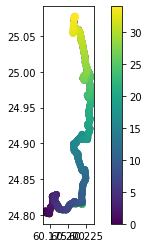

In [24]:
gdf.plot(column='shape_dist_traveled', legend=True)

## Fetching data directly from HSL

In [67]:
r = requests.get('http://dev.hsl.fi/gtfs/hsl.zip')
r

<Response [200]>

In [78]:
gtfs_zip = ZipFile(BytesIO(r.content))
gtfs_zip.namelist()

['agency.txt',
 'calendar.txt',
 'calendar_dates.txt',
 'call_line_phone_numbers.txt',
 'fare_attributes.txt',
 'fare_rules.txt',
 'feed_info.txt',
 'routes.txt',
 'shapes.txt',
 'stops.txt',
 'stop_times.txt',
 'transfers.txt',
 'translations.txt',
 'trips.txt']

In [79]:
df = pd.read_csv(gtfs_zip.open('shapes.txt'))
df.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,1001 5_20200504_1,60.207820,24.968094,1,0.000
1,1001 5_20200504_1,60.207712,24.968073,2,0.012
2,1001 5_20200504_1,60.207211,24.967860,3,0.070
3,1001 5_20200504_1,60.205753,24.967077,4,0.239
4,1001 5_20200504_1,60.204806,24.966490,5,0.350


## Extracting route geometries from csv

In [59]:
data = pd.read_csv('shapes.txt')
print(data.shape)
data.head()

(433046, 5)


,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,1001 5_20200504_1,60.207820,24.968094,1,0.000
1,1001 5_20200504_1,60.207712,24.968073,2,0.012
2,1001 5_20200504_1,60.207211,24.967860,3,0.070
3,1001 5_20200504_1,60.205753,24.967077,4,0.239
4,1001 5_20200504_1,60.204806,24.966490,5,0.350


In [58]:
data = pd.read_csv('shape2.txt')
print(data.shape)
data.head()

(1411, 5)


,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,2550_20200408_1,60.209787,25.077401,1,0.000
1,2550_20200408_1,60.209630,25.076818,2,0.036
2,2550_20200408_1,60.209586,25.076673,3,0.046
3,2550_20200408_1,60.209482,25.076290,4,0.070
4,2550_20200408_1,60.209403,25.076035,5,0.086


In [64]:
geodata = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.shape_pt_lat, data.shape_pt_lon))
geodata2 = geodata.groupby(['shape_id'])['geometry'].apply(lambda x: LineString(x.tolist()))
geodata2.head()

shape_id
1001 5_20200504_1    LINESTRING (60.20782 24.968094, 60.207712 24.9...
1001 6_20200504_2    LINESTRING (60.20782 24.968094, 60.207712 24.9...
1001 7_20200302_2    LINESTRING (60.18201999999999 24.927002, 60.18...
1001 9_20200504_1    LINESTRING (60.18205699999999 24.928194, 60.18...
1001H5_20200504_2    LINESTRING (60.21654399999999 24.954568, 60.21...
Name: geometry, dtype: object